C:\Users\chara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Observation:The GMM using EM algorithm matched the true labels more closely than K means


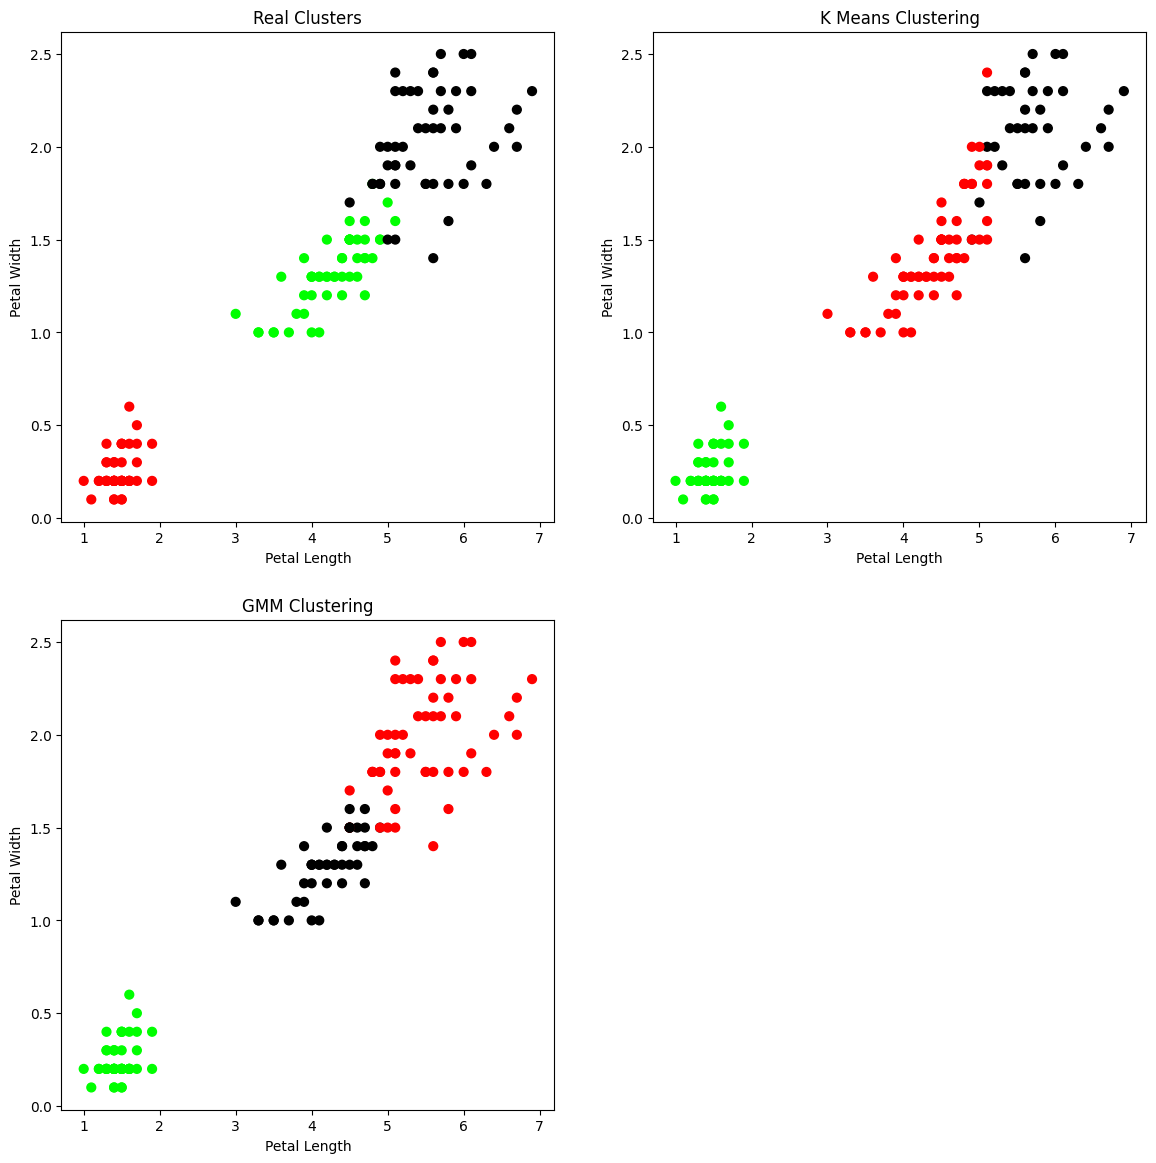

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

iris=datasets.load_iris()
X=pd.DataFrame(iris.data)
X.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

Y=pd.DataFrame(iris.target)
Y.columns=['Targets']

classifier=KMeans(n_clusters=3)
classifier.fit(X)

plt.figure(figsize=(14,14))
colormap=np.array(['red','lime','black'])

plt.subplot(2,2,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[Y.Targets], s=40)
plt.title("Real Clusters")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

plt.subplot(2,2,2)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[classifier.labels_], s=40)
plt.title("K Means Clustering")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

scaler=preprocessing.StandardScaler()
scaler.fit(X)
xsa=scaler.transform(X)
xs=pd.DataFrame(xsa,columns=X.columns)

gmm=GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y=gmm.predict(xs)

plt.subplot(2,2,3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[gmm_y], s=40)
plt.title("GMM Clustering")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
print("Observation:The GMM using EM algorithm matched the true labels more closely than K means")